In [2]:
from numpy import *
import matplotlib.pyplot as plt

In [3]:
# Range of time (unit: year)
t = arange(0, 650, 1)
time = arange(2000, 2000 + len(t))
# Range of age (unit: year)
age = arange(1, 1001)
# Concentration of CO2
X_at = [1715 * exp(0.0305 * ti) / (1715 + exp(0.0305 * ti) - 1) + 284 for ti in t]
# Global annual mean temperature
sigma = 4.5
Ts = [15 + (sigma / log(2)) * log(Xa / 285)
      for Xa in X_at]

############# Input #############
x = 0.65
Gamma_Ts = [42.7 + 1.68 * (T - 25) + 0.012 * (T - 25) ** 2 for T in Ts]
Beta_X_Ts = [(3 * x * Xa * Gamma) / ((x * Xa - Gamma) * (x * Xa + 2 * Gamma)) for Xa, Gamma in zip(X_at, Gamma_Ts)]
s0 = 300 # Input at initial time
# Input
S1 = [s0 * (1 + 2.14 * Beta * log(Xa / 285)) for Beta, Xa in zip(Beta_X_Ts, X_at)]
# Temperature scale
Var = [2 ** (0.1 * new - 1.5) for new in Ts]

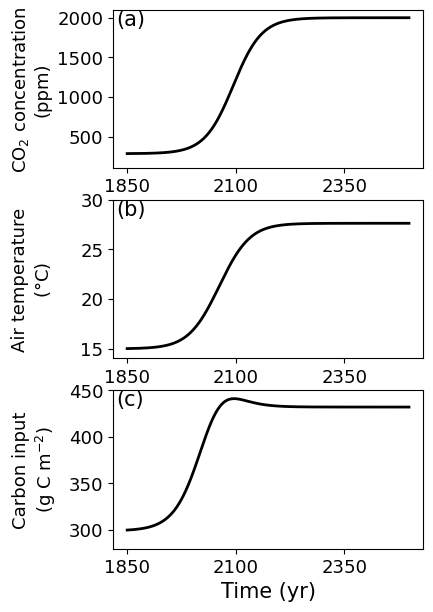

In [11]:
fig = plt.figure(figsize=(4,7))

ax1 = fig.add_subplot(3,1,1)
ax1.set_xlabel('Time (yr)', fontsize=15)
ax1.set_ylabel('CO$_2$ concentration\n(ppm)', fontsize=13)
ax1.plot(arange(1850, 2500), X_at, color='k', linewidth=2)
ax1.tick_params('both', labelsize=13)
ax1.set_ylim(100,2100)
ax1.set_xticks([1850, 2100, 2350])
ax1.text(0.01,0.9, '(a)', fontsize=15, transform=ax1.transAxes)

ax2 = fig.add_subplot(3,1,2)
ax2.set_xlabel('Time (yr)', fontsize=15)
ax2.set_ylabel('Air temperature\n($\degree$C)', fontsize=13, labelpad=20)
ax2.plot(arange(1850, 2500), Ts, color='k', linewidth=2)
ax2.tick_params('both', labelsize=13)
ax2.set_ylim(14,30)
ax2.set_xticks([1850, 2100, 2350])
ax2.text(0.01,0.9, '(b)', fontsize=15, transform=ax2.transAxes)


ax3 = fig.add_subplot(3,1,3)
ax3.set_xlabel('Time (yr)', fontsize=15)
ax3.set_ylabel('Carbon input\n(g C $\mathregular{m^{-2}}$)', fontsize=13, labelpad=8)
ax3.plot(arange(1850, 2500), S1, color='k', linewidth=2)
ax3.tick_params('both', labelsize=13)
ax3.set_ylim(280,450)
ax3.set_xticks([1850, 2100, 2350])
ax3.text(0.01,0.9, '(c)', fontsize=15, transform=ax3.transAxes)


plt.savefig('Figure_S11.png', dpi = 600, bbox_inches='tight')
